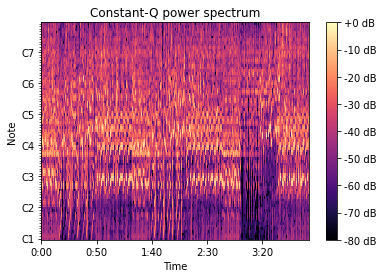

In [12]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

y1, sr = librosa.load("/content/drive/Shareddrives/G-33-2022/Audios/finished/Lily Allen - Everyone's At It - Multitrack/Lily Allen - Everyone's At It - Multitrack/Everyone's At It - Lead Vocals.wav")
y2, sr = librosa.load("/content/drive/Shareddrives/G-33-2022/Audios/finished/Lily Allen - Everyone's At It - Multitrack/Lily Allen - Everyone's At It - Multitrack/Everyone's At It - Piano.wav")

y=y1[1:5346243]+y2[1:5346243]
C = np.abs(librosa.cqt(y, sr=sr))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [11]:

y1[1:5346243]

array([-4.8398483e-06,  2.4418491e-06,  5.1175925e-06, ...,
       -5.9664506e-04, -5.4225291e-04, -4.1492566e-04], dtype=float32)

In [13]:
maxi  = np.max(C,0)
x = np.sum(C,1)
keys=np.reshape(x,(7,-1))
print(x.shape)
print(keys.shape)


(84,)
(7, 12)


(12,)


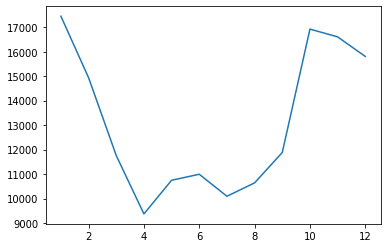

[[4.00000000e+00 9.37160742e+03]
 [7.00000000e+00 1.00930010e+04]
 [8.00000000e+00 1.06402881e+04]
 [5.00000000e+00 1.07471123e+04]
 [6.00000000e+00 1.09921758e+04]
 [3.00000000e+00 1.17561348e+04]
 [9.00000000e+00 1.18821055e+04]
 [2.00000000e+00 1.49378291e+04]
 [1.20000000e+01 1.58065576e+04]
 [1.10000000e+01 1.66067949e+04]
 [1.00000000e+01 1.69235234e+04]
 [1.00000000e+00 1.74492871e+04]]


In [14]:
chords = sum(keys,1)
index = np.linspace(1,12,12)
D = np.stack((index,chords),1)
D=D[D[:,1].argsort()]
print(chords.shape)
plt.plot(index,chords)
plt.show()
print(D)

In [ ]:
D[:,1].argsort()


array([ 2,  1, 10,  9,  3,  8,  0, 11,  5,  7,  6,  4])

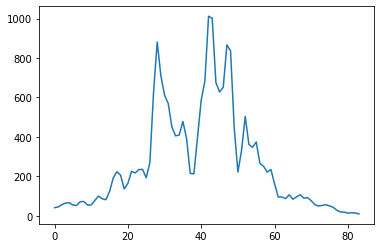

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x)
plt.show()

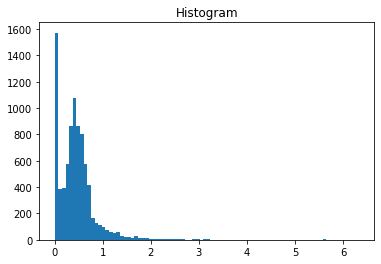

In [ ]:
plt.hist(maxi, bins=84)
plt.title("Histogram")
plt.show()